In [1]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
lead_df = pd.read_csv("Leads.csv")

In [4]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting the dataset

In [7]:
lead_df.shape

(9240, 37)

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Dataset has some missing values

## Cleaning the dataset

In [10]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [11]:
# checking the columns if they are having null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
# Finding the null percentages
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Some columns have high percentage of missing values. Dropping the columns that have equal to or more than 40% of missing values.

In [13]:
#Dropping the columns
lead_df = lead_df.drop(columns=['Lead Quality','Lead Profile','How did you hear about X Education','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [14]:
#Checking the dataset after removing columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

A) Column - 'What is your current occupation' contains 27% missing values.

In [15]:
# Finding the percentage of the different categories of the column
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

We can impute missing values in the column since the most values are 'Unemployed'. 

In [16]:
# Imputing the missing data in the column with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

B) Column - 'Specialization' contains 37% missing values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

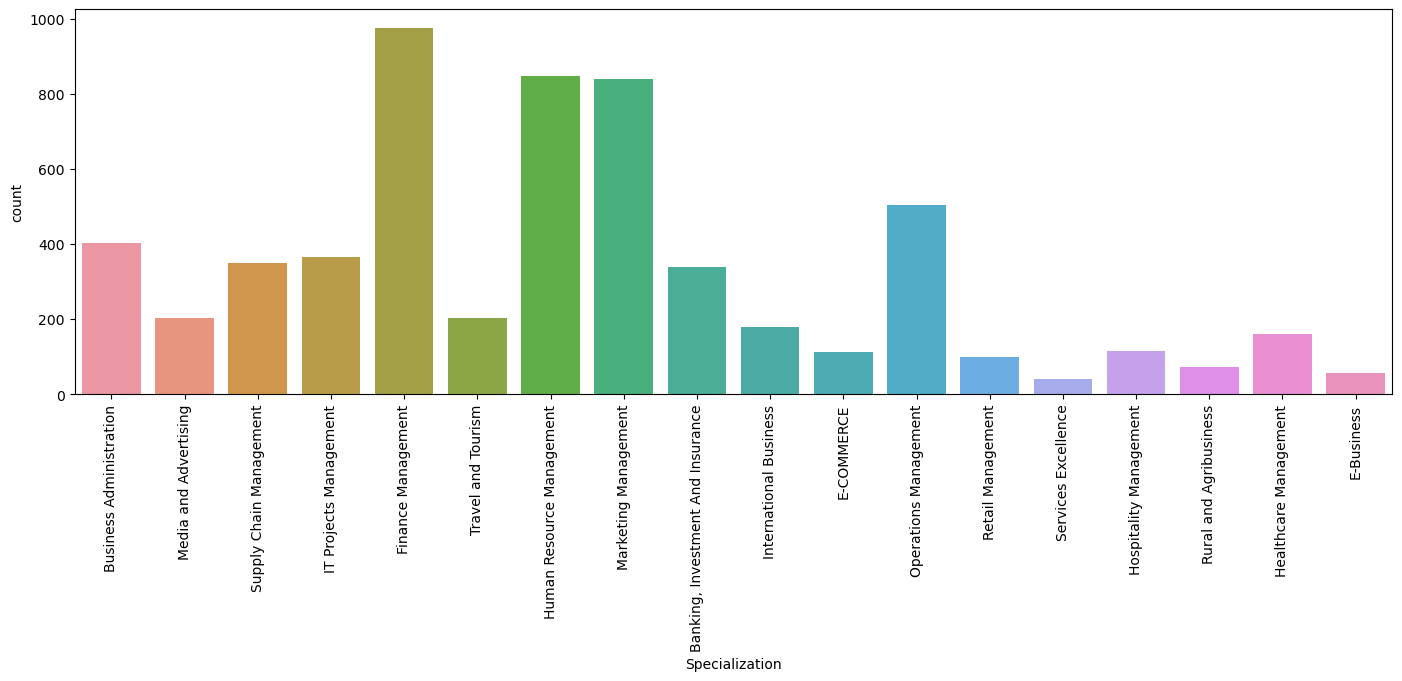

In [17]:
plt.figure(figsize=(17,5))
sns.countplot(lead_df,x='Specialization')
plt.xticks(rotation=90)

The lead may or may not have any specialization therefore they leave the column unattended. So we will create another category 'Other' for this

In [18]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other')

C) Column - 'Tags' contains 36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

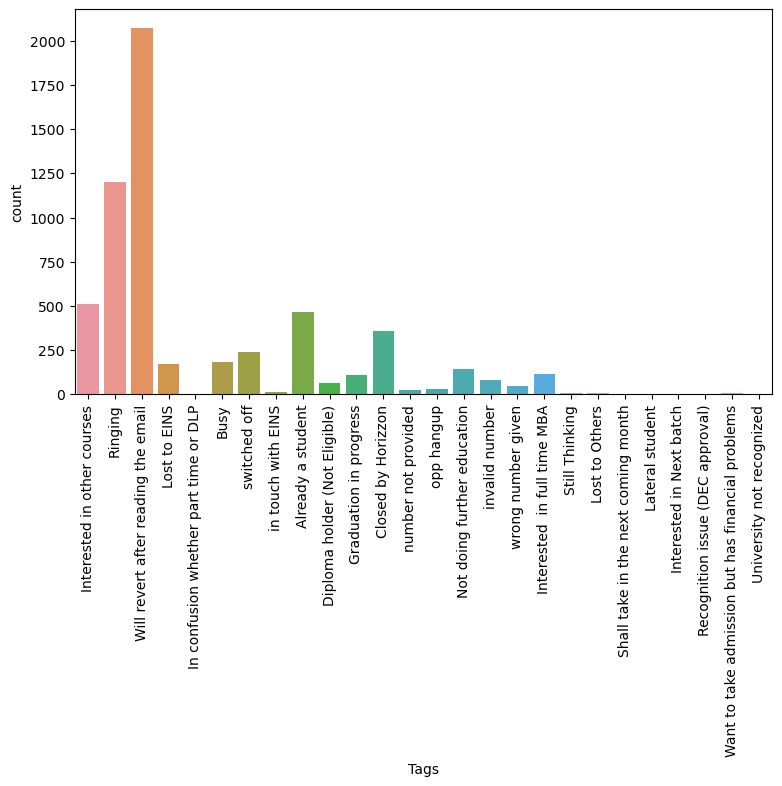

In [19]:
# Visualizing the Tags column
plt.figure(figsize=(9,5))
sns.countplot(lead_df,x='Tags')
plt.xticks(rotation=90)

We can impute missing values in this column with 'Will revert after reading the email' value.

In [20]:
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

D) Column - 'What matters most to you in choosing a course' contains 29% missing values.

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

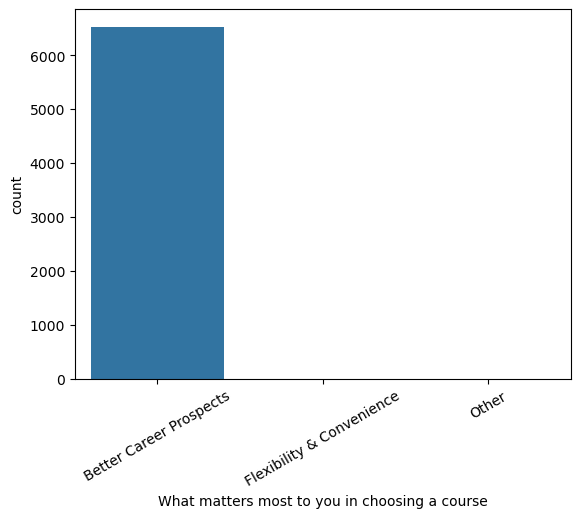

In [21]:
# Visualizing the column 'What matters most to you in choosing a course'

sns.countplot(lead_df,x='What matters most to you in choosing a course')
plt.xticks(rotation=30)

In [22]:
# Finding the percentage of all the different categories of this column:
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can remove this column.

In [23]:
# Dropping the column 
lead_df=lead_df.drop('What matters most to you in choosing a course',axis=1)

E) Column - 'Country' contains 27% missing values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

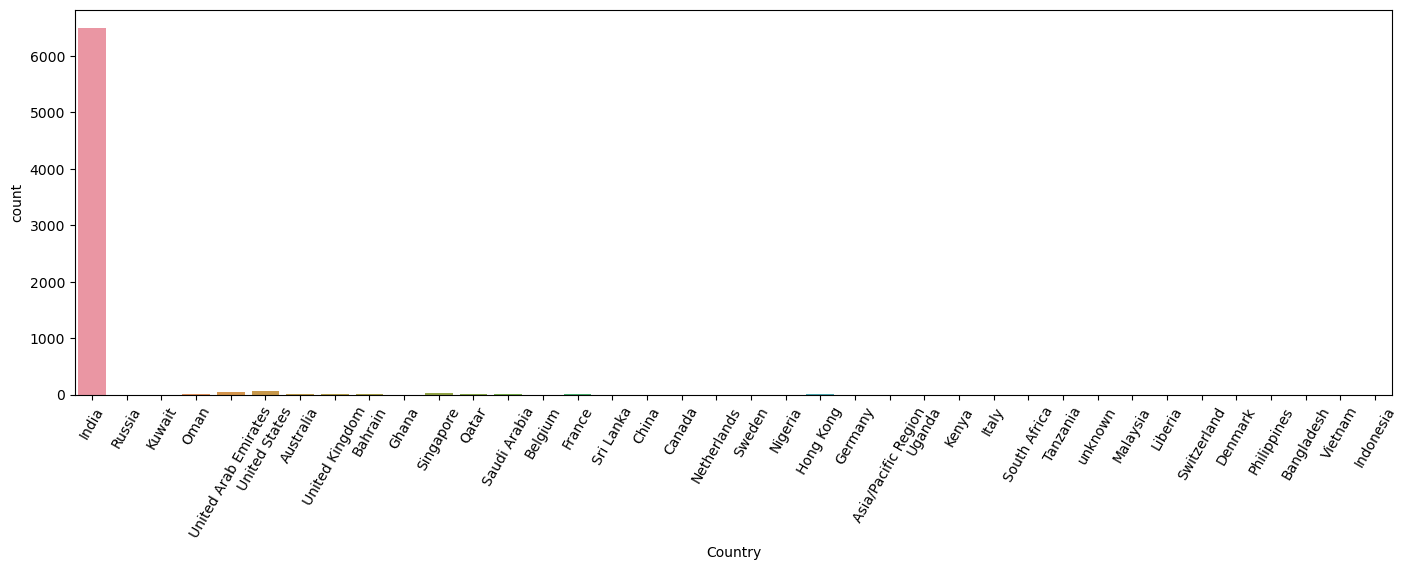

In [24]:
#Visualising the 'country' column

plt.figure(figsize=(17,5))
sns.countplot(lead_df,x='Country')
plt.xticks(rotation=60)

Most values in this column are 'India' so we can impute the missing values in this column with this value.

In [25]:
# Imputing the missing data in the column with 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

F) Column - 'City' contains 40% missing values.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

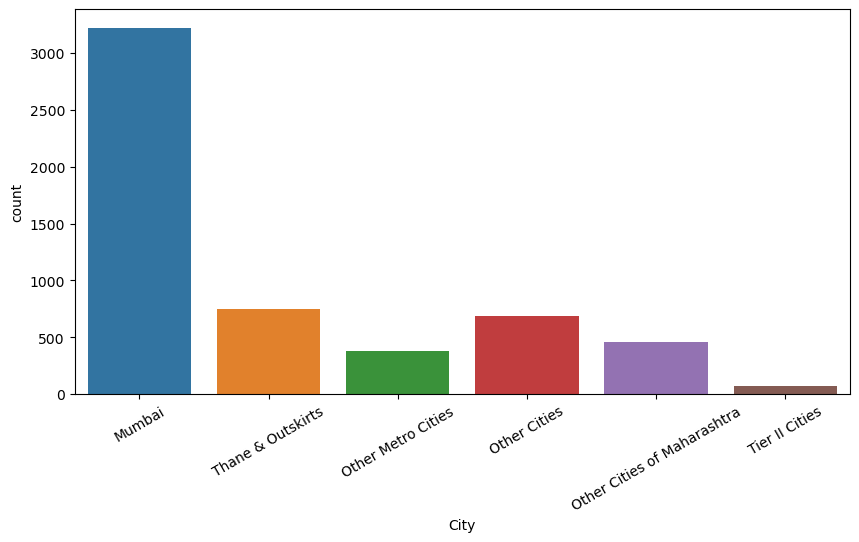

In [26]:
# Visualizing column 'city'

plt.figure(figsize=(10,5))
sns.countplot(lead_df,x='City')
plt.xticks(rotation=30)

In [27]:
# Finding the percentage of the categories of this column.
round(lead_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

 Most of the values in the column are 'Mumbai' so we can impute missing values in this column with this value.

In [28]:
# Imputing the missing values in the 'City' column with 'Mumbai'
lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

In [29]:
# Finding the null percentages across columns after removing the above mentioned columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [30]:
# Dropping the rows that are under 2% with null values
lead_df.dropna(inplace = True)

In [31]:
# Percentage of rows retained 
(len(lead_df.index)/9240)*100

98.2034632034632

### Retained 98% of the values after data cleaning.

## EDA (Exploratory Data Analysis)

In [32]:
# Checking if there are any duplicate values.
lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicate values in the dataset.

## Analysis - Univariate and Bivariate Analysis

### 1) Converted

Target variable - It indicates whether a lead has been successfully converted or not [(1) or (0)]

In [33]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
print(Converted)

37.85541106458012


Conversion rate is 38%.

### 2) Lead source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

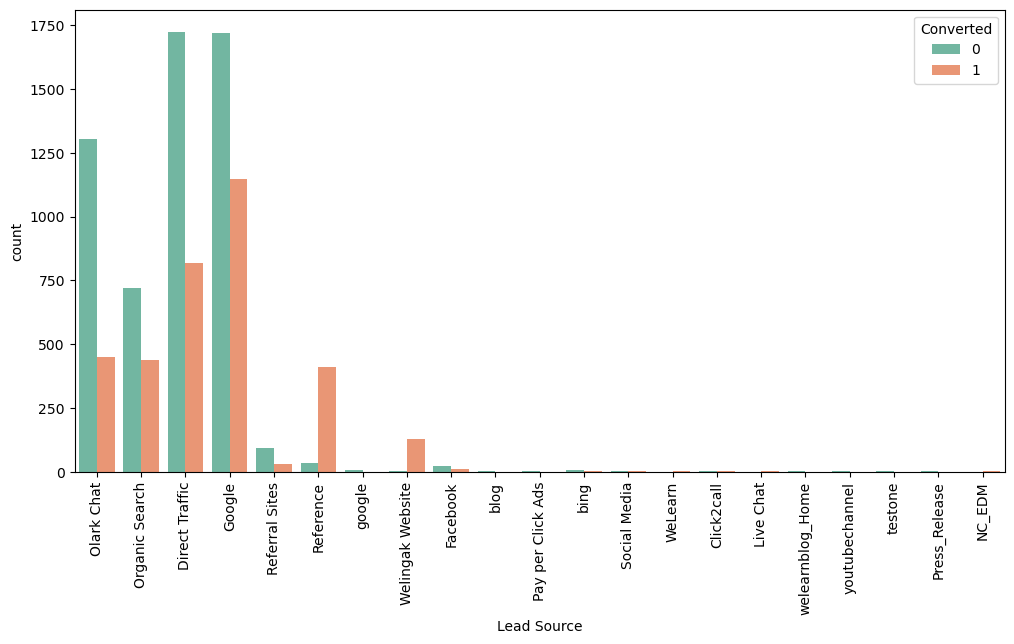

In [34]:
#Visualising 'Lead Source'

plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df, palette='Set2')
plt.xticks(rotation = 90)

In [35]:
# Creating another category 'Others' as some of the Lead Sources do not have much values.

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

### 3) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

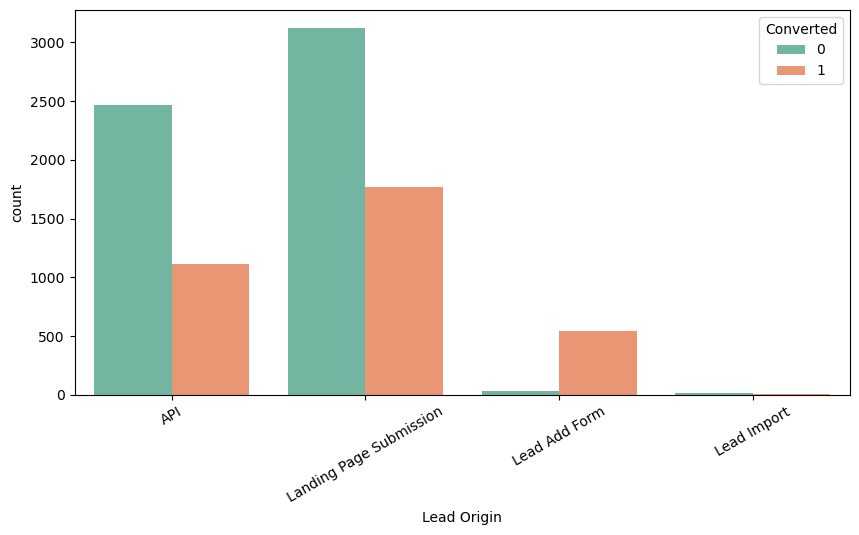

In [36]:
#Visualising 'Lead Origin'

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 30)

A) API and Landing Page Submission have 30-35% conversion rate but they have more count of lead originated than others.
B) Lead Import are comparably less in count.
C) Lead Add Form has more than 90% conversion rate but count of lead are not very high.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

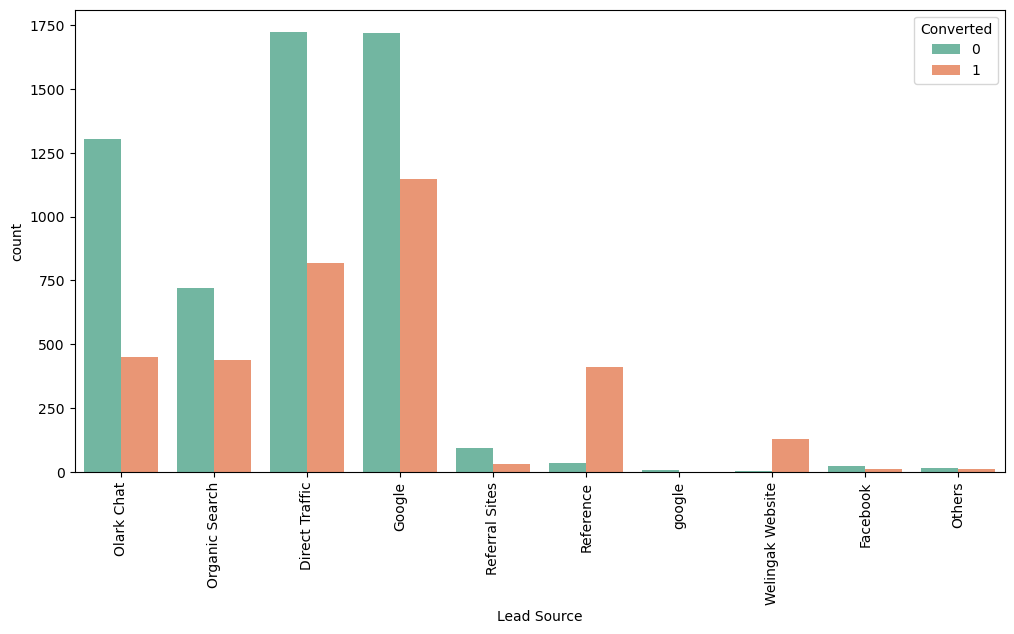

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

1) Conversion Rate of reference leads and leads through welingak website is high.

2) Google and Direct traffic generates maximum number of leads.

Olark chat, organic search, direct traffic, and google leads should be focused more and also generate more leads from reference and welingak website.

### 4)  Do not call 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

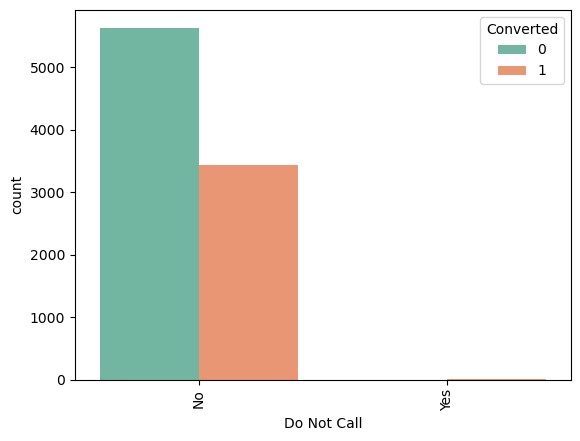

In [38]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 5) Total Visits

<Axes: >

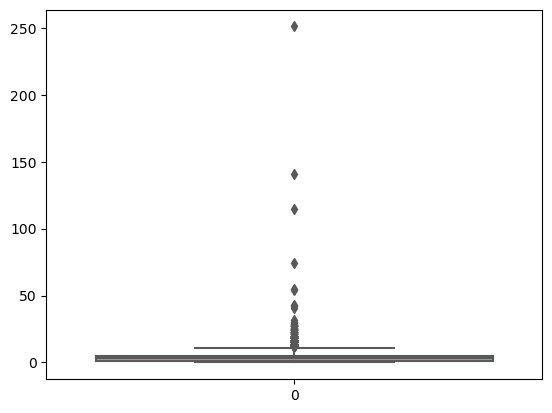

In [39]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set2')

#### There are many outliers in the data so we can cap the outliers to 95%

In [40]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [41]:
percentile = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentile[0]] = percentile[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentile[1]] = percentile[1]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

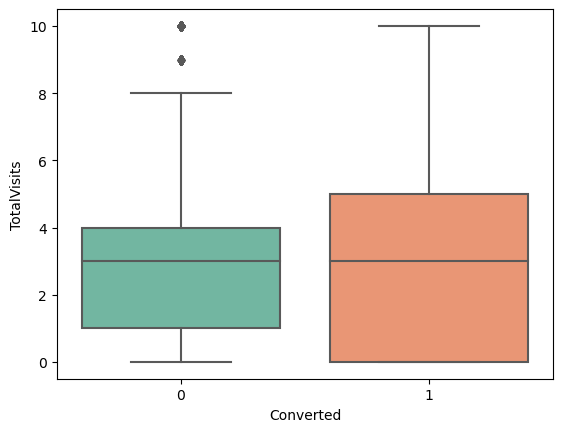

In [42]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set2')

Nothing can be concluded on the basis of Total Visits as median for converted and not converted leads are same.

### 6) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

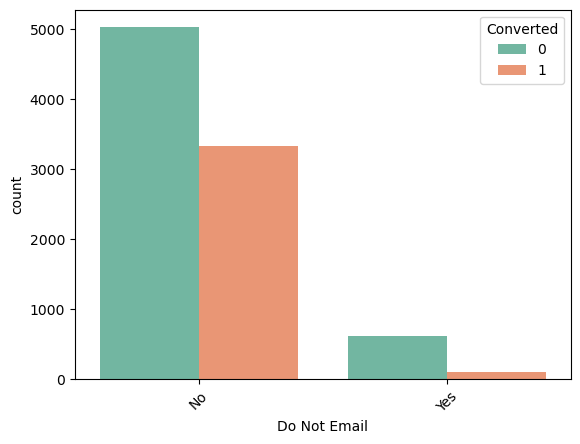

In [43]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 45)

No Inference can be drawn with this parameteras most entries are 'No'

### 7) Total Time Spent on Website

In [44]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

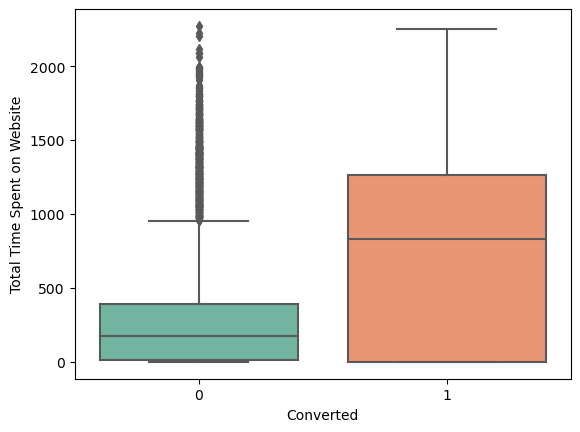

In [45]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set2')

Website should be developed to be more engaging as leads spending more time on the website are more likely to be converted.

### 8) Last Activity

In [46]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

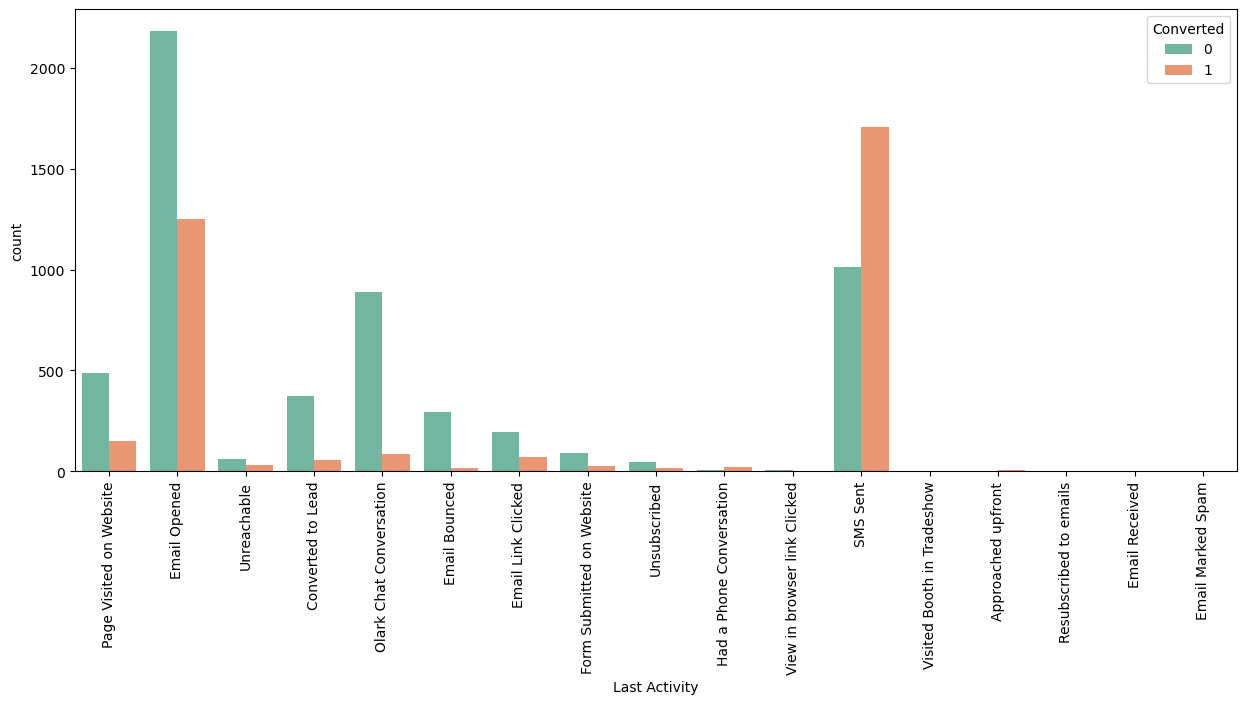

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

Last activity as SMS Sent has conversion rate of 60%.

While many leads have Email opened as their last activity.

### 9)  Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

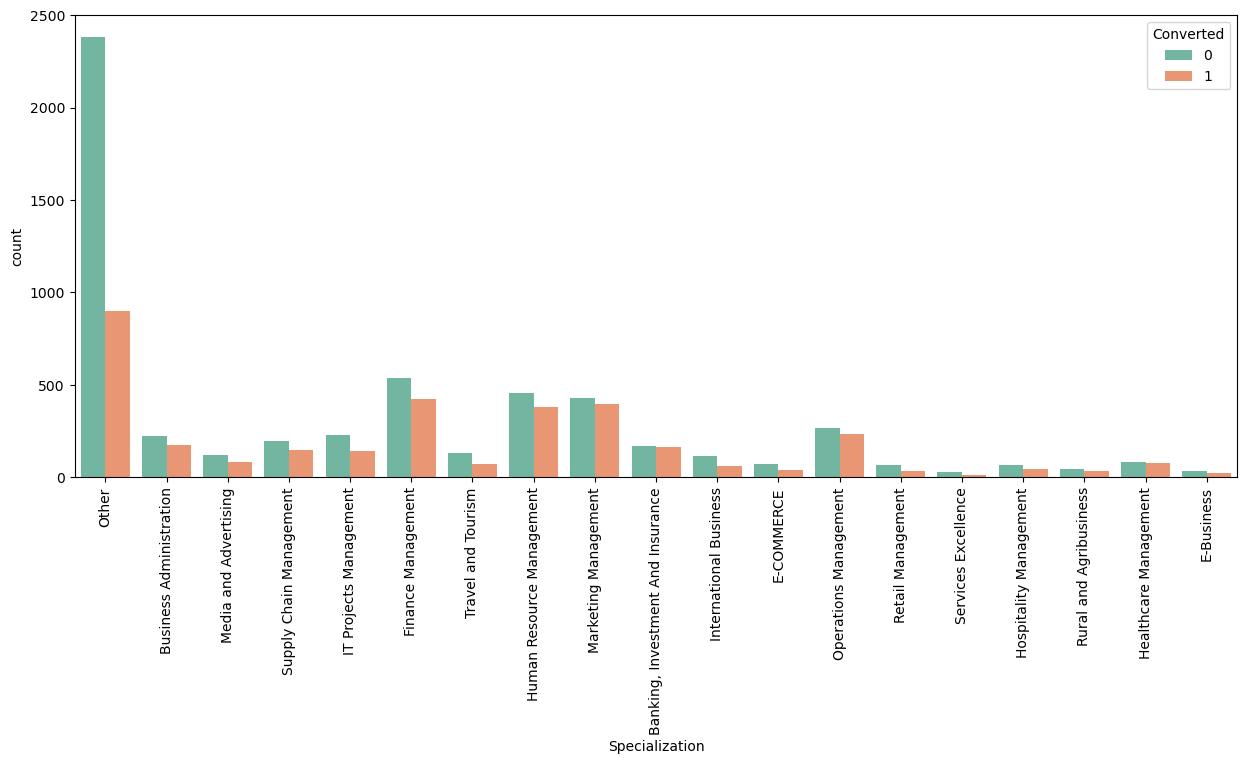

In [48]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

Specialization with high conversion rate should be focused more.

### 10) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

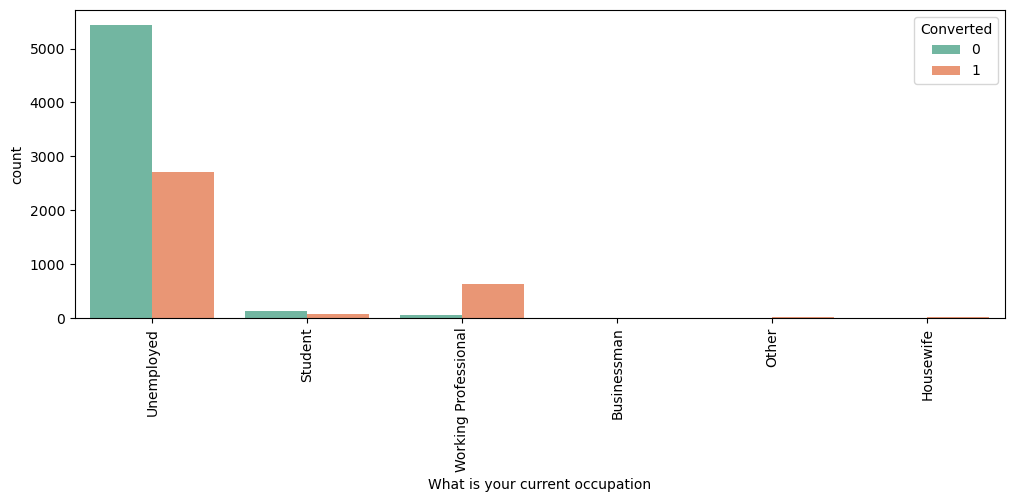

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

1) Unemployed leads are the most having around 30-35% conversion rate.

2) Working Professionals have high chances of converting.

### 11)  Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

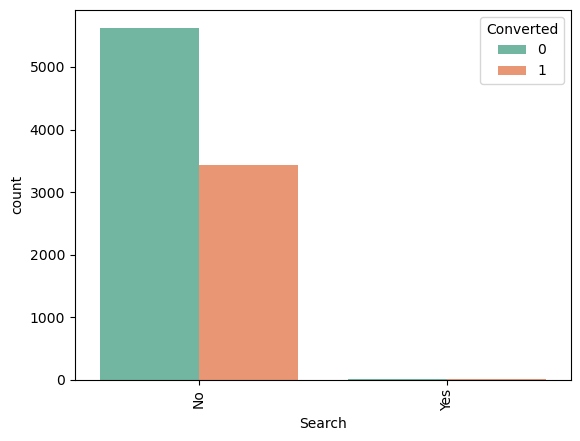

In [50]:
sns.countplot(x = "Search", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 12)  Magazine

(array([0]), [Text(0, 0, 'No')])

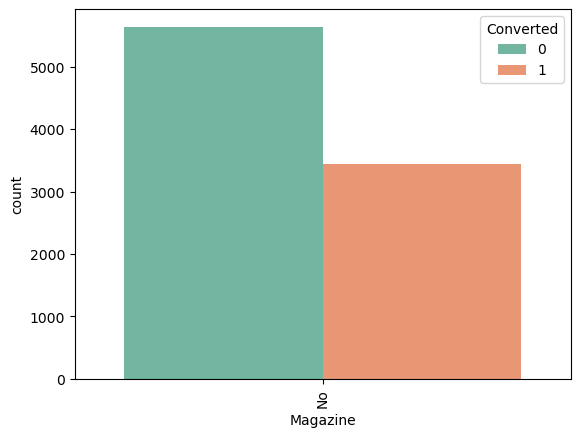

In [51]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 13)  Newspaper Article

<Axes: xlabel='Newspaper Article', ylabel='count'>

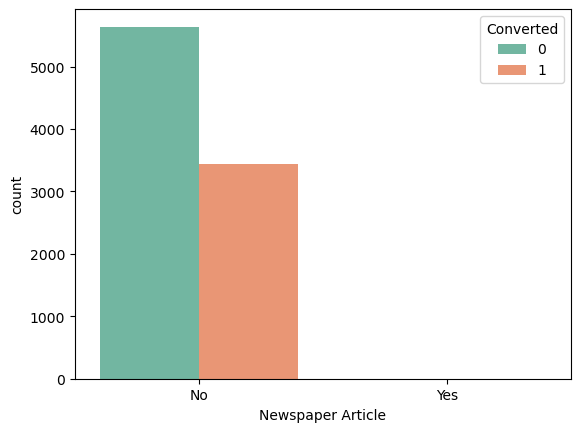

In [52]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df,palette='Set2')


No Inference can be drawn with this parameteras most entries are 'No'

### 14)  Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

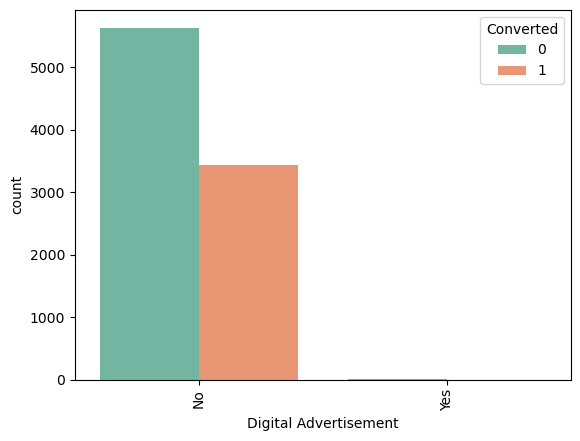

In [53]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 15)Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

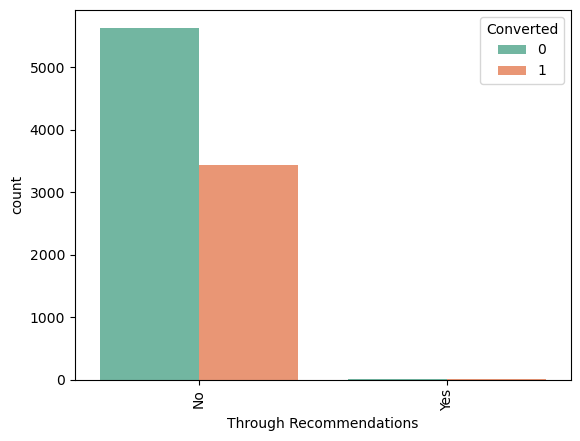

In [54]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

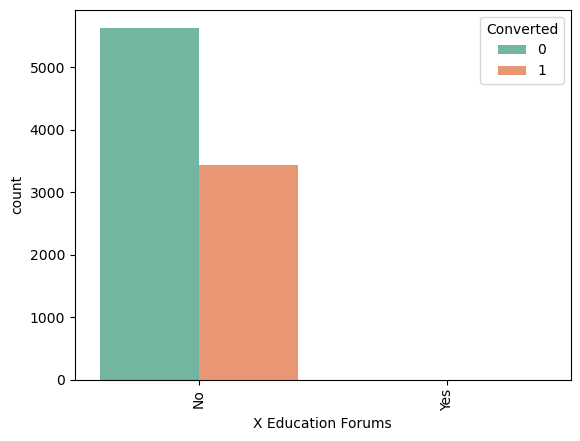

In [55]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 17) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

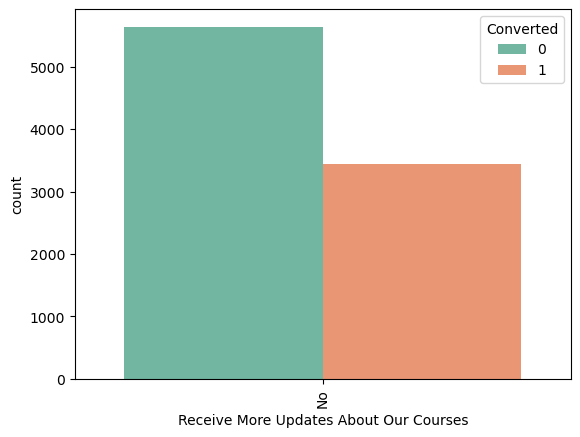

In [56]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 18)  Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

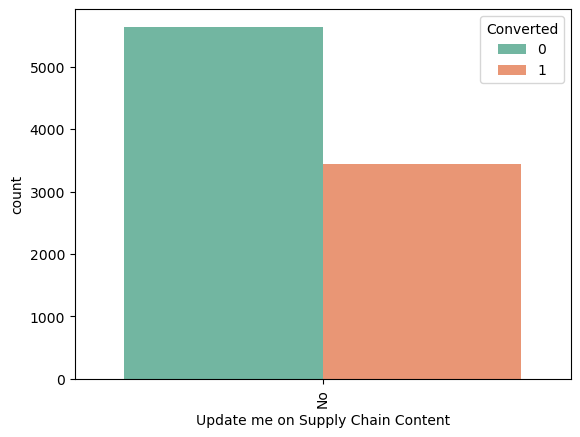

In [57]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 19) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

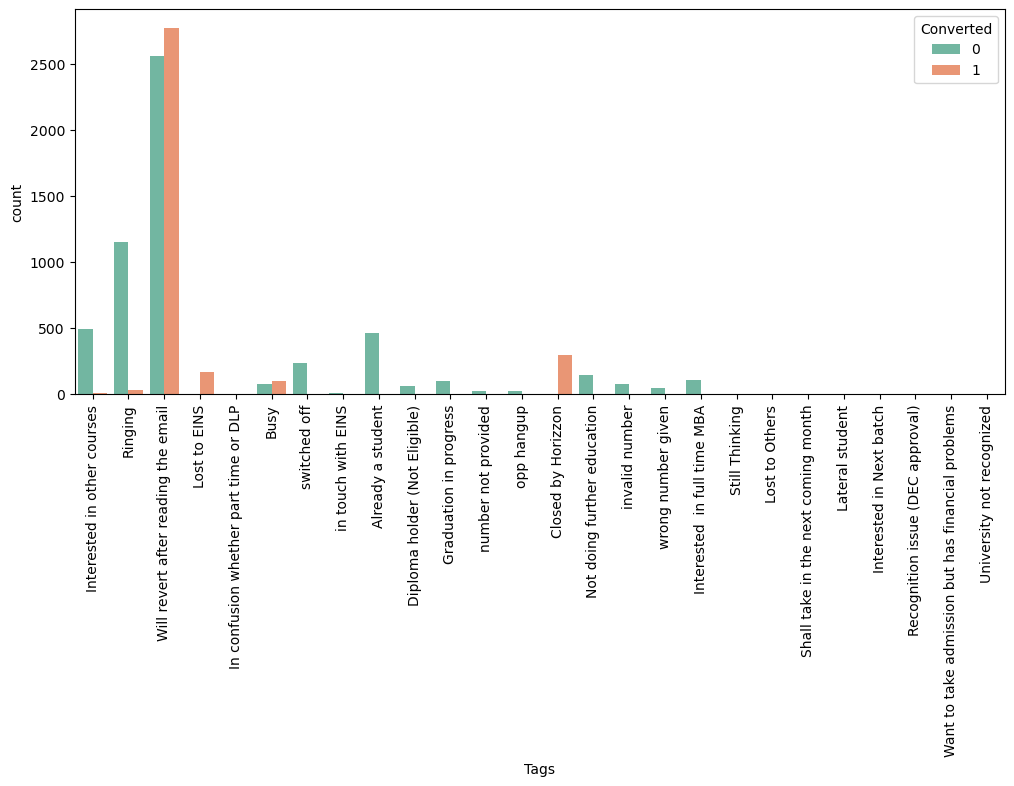

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

This column need to be removed before model building as it it prepared by the sales team for their analysis.

### 20)  Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

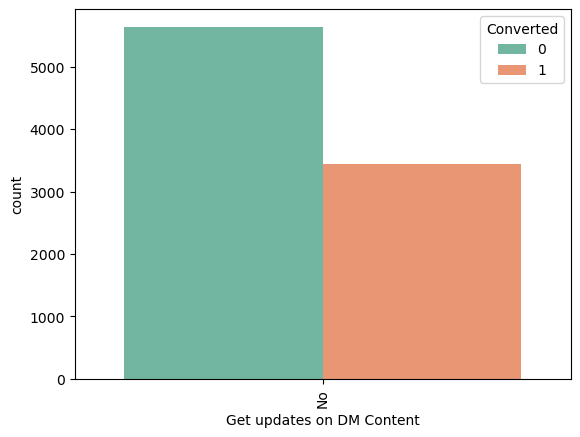

In [59]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 21) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

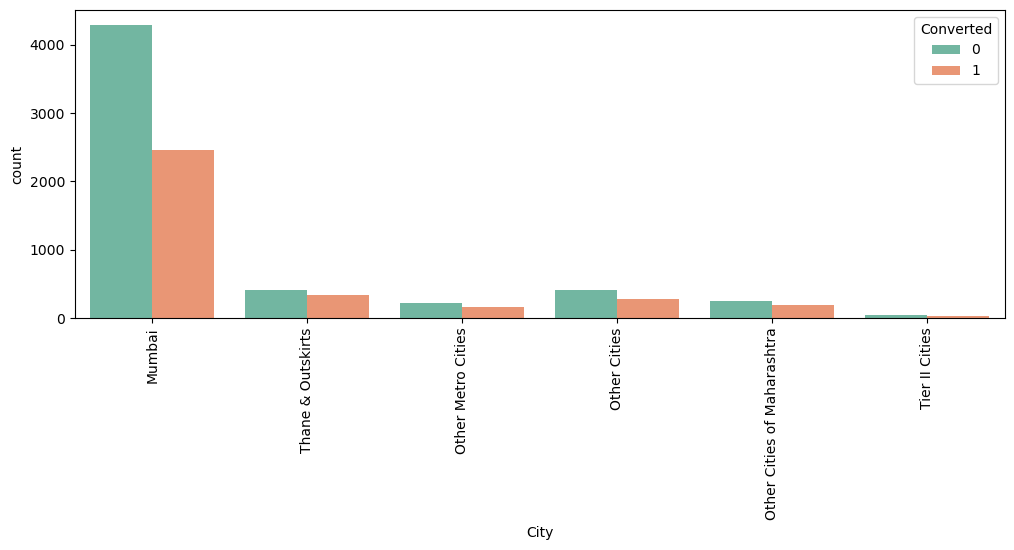

In [60]:
plt.figure(figsize=(12,4))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

Most of the leads are from Mumbai with around 50% conversion rate.

### 22) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

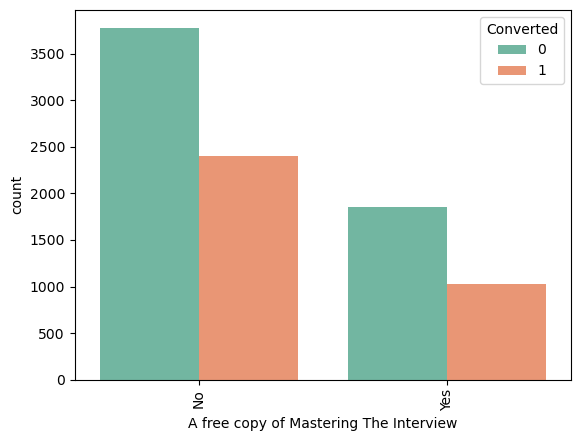

In [61]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 23)  I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

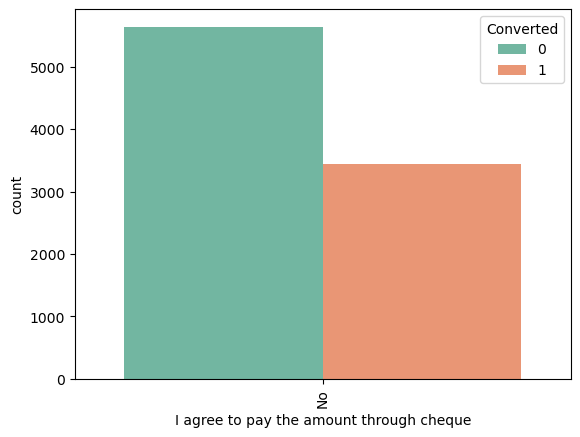

In [62]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

No Inference can be drawn with this parameteras most entries are 'No'

### 24)  Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

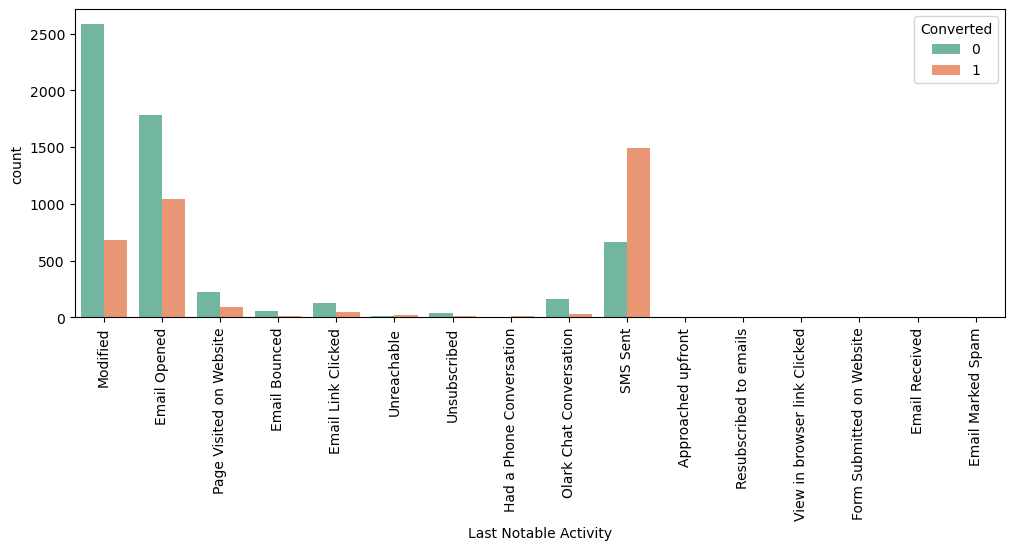

In [63]:
plt.figure(figsize=(12,4))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df,palette='Set2')
plt.xticks(rotation = 90)

#### Inference

Many columns are not adding any information to the model based on the univariate analysis.

Hence we can drop them for further analysis

In [64]:
lead_df = lead_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [65]:
lead_df.shape

(9074, 14)

In [66]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Preparing the data

### 1)  Creating Dummy variables for the categorical features-

In [68]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_df = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)

In [69]:
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
# Concatenate the dummy_df to the lead_df dataset
lead_df = pd.concat([lead_df, dummy_df], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Dropping the columns for which dummies were created

lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [72]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,No,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,No,No,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,No,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,No,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,No,No,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 2)  Convert the binary variables (Yes/No) to (1/0)

In [73]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

In [74]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 3) Splitting the dataset into train and test set.

In [75]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [76]:
# Putting the target variable to Y
y = lead_df['Converted']

In [79]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)             
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Marked Spam', False, 2),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Email Received', False, 3),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone 

In [86]:
# Viewing the columns that are selected by RFE
colms = X_train.columns[rfe.support_]
print(colms)

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current 

## Building the Model

### Model 1

In [87]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[colms])
logmod1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logmod1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.9
Date:                Sun, 19 Nov 2023   Deviance:                       5133.8
Time:                        14:25:42   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4083
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9205      1.287      1.492      0.136      -0.602       4.443
Do Not Email                                            -1.6021      0.221     -7.252      0.000      -2.035      -1.169
Do Not Call                                             21.6307    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.992      0.000       1.029       1.191
Lead Origin_Landing Page Submission                     -1.1029      0.131     -8.448      0.000      -1.359      -0.847
Lead Origin_Lead Add Form                                1.4892      0.894      1.666      0.096      -0.263       3.241
Lead Origin_Lead Import                                  0.9150      0.477      1.920      0.055      -0.019       1.849
Lead Source_Olark Chat                                   1.1071      0.125      8.871      0.000       0.862       1.352
Lead Source_Reference                                    1.8356      0.918      2.000      0.046       0.037       3.635
Lead Source_Welingak Website                             4.3940      1.150      3.821      0.000       2.140       6.648
Last Activity_Converted to Lead                         -0.9793      0.245     -3.993      0.000      -1.460      -0.499
Last Activity_Email Bounced                             -1.1454      0.646     -1.774      0.076      -2.411       0.120
Last Activity_Form Submitted on Website                 -0.5618      0.355     -1.583      0.113      -1.257       0.134
Last Activity_Had a Phone Conversation                   1.8991      1.155      1.644      0.100      -0.366       4.164
Last Activity_Olark Chat Conversation                   -1.2851      0.214     -5.996      0.000      -1.705      -0.865
Last Activity_Page Visited on Website                   -0.3160      0.234     -1.353      0.176      -0.774       0.142
Last Activity_Resubscribed to emails                    11.3058   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4523      0.176      2.563      0.010       0.106       0.798
Last Activity_Unsubscribed                               0.6971      1.126      0.619      0.536      -1.510       2.904
Last Activity_View in browser link Clicked              -0.8736      1.196     -0.730      0.465      -3.217       1.470
Specialization_Hospitality Management                   -0.4209      0.330     -1.277      0.202      -1.067       0.225
Specialization_Other                                    -1.1300      0.127     -8.874      0.000      -1.380      -0.880
Specialization_Services Excellence                      -0

Pvalue of 'What is your current occupation_Housewife' , 'What is your current occupation_Student' , 'Lead Origin_Lead Add Form' , 'Last Notable Activity_Had a Phone Conversation' is very high. We will drop the columns

In [91]:
# Dropping the columns

colm1 = colms.drop('What is your current occupation_Housewife','What is your current occupation_Student')
colm1 = colms.drop('Lead Origin_Lead Add Form','Last Notable Activity_Had a Phone Conversation')

### Model 2

In [92]:
X_train_sm = sm.add_constant(X_train[colm1])
logmod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.4
Date:                Sun, 19 Nov 2023   Deviance:                       5136.8
Time:                        14:53:08   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9306      1.287      1.500      0.134      -0.591       4.453
Do Not Email                                            -1.6045      0.221     -7.264      0.000      -2.037      -1.172
Do Not Call                                             21.6223    3.3e+04      0.001      0.999   -6.46e+04    6.47e+04
Total Time Spent on Website                              1.1080      0.041     26.983      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1220      0.130     -8.616      0.000      -1.377      -0.867
Lead Origin_Lead Import                                  0.8984      0.477      1.885      0.059      -0.036       1.833
Lead Source_Olark Chat                                   1.0999      0.125      8.832      0.000       0.856       1.344
Lead Source_Reference                                    3.3100      0.244     13.578      0.000       2.832       3.788
Lead Source_Welingak Website                             5.8742      0.731      8.039      0.000       4.442       7.306
Last Activity_Converted to Lead                         -0.9827      0.245     -4.008      0.000      -1.463      -0.502
Last Activity_Email Bounced                             -1.1459      0.646     -1.774      0.076      -2.411       0.120
Last Activity_Form Submitted on Website                 -0.5673      0.355     -1.598      0.110      -1.263       0.128
Last Activity_Had a Phone Conversation                   1.8927      1.155      1.638      0.101      -0.372       4.157
Last Activity_Olark Chat Conversation                   -1.2913      0.214     -6.025      0.000      -1.711      -0.871
Last Activity_Page Visited on Website                   -0.3130      0.233     -1.343      0.179      -0.770       0.144
Last Activity_Resubscribed to emails                    11.3053   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4486      0.176      2.543      0.011       0.103       0.794
Last Activity_Unsubscribed                               0.6951      1.126      0.617      0.537      -1.511       2.901
Last Activity_View in browser link Clicked              -0.8821      1.197     -0.737      0.461      -3.228       1.464
Specialization_Hospitality Management                   -0.4224      0.330     -1.282      0.200      -1.068       0.224
Specialization_Other                                    -1.1427      0.127     -8.983      0.000      -1.392      -0.893
Specialization_Services Excellence                      -0.4346      0.658     -0.661      0.509      -1.724       0.854
What is your current occupation_Housewife               21

### Check for the VIF values

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[colm1].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm1].values, i) for i in range(X_train[colm1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features     VIF
14               Last Activity_Resubscribed to emails     inf
33       Last Notable Activity_Resubscribed to emails     inf
23         What is your current occupation_Unemployed  265.79
30                     Last Notable Activity_Modified  109.15
28                 Last Notable Activity_Email Opened   90.88
34                     Last Notable Activity_SMS Sent   79.51
24  What is your current occupation_Working Profes...   23.33
32      Last Notable Activity_Page Visited on Website   12.60
15                             Last Activity_SMS Sent    8.51
22            What is your current occupation_Student    7.58
3                 Lead Origin_Landing Page Submission    7.37
31      Last Notable Activity_Olark Chat Conversation    7.04
27           Last Notable Activity_Email Link Clicked    6.47
36                 Last Notable Activity_Unsubscribed    4.90
19                               Specialization_Other    4.73
29     L

Drop the column 'What is your current occupation_Unemployed' because it has high VIF.

In [96]:
colm1 = colm1.drop('What is your current occupation_Unemployed')

### Model 3

In [106]:
X_train_sm = sm.add_constant(X_train[colm1])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Sun, 19 Nov 2023   Deviance:                       5142.6
Time:                        15:28:43   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0215      1.121      0.911      0.362      -1.175       3.218
Do Not Email                                            -1.5836      0.219     -7.219      0.000      -2.014      -1.154
Do Not Call                                             21.5899   3.29e+04      0.001      0.999   -6.45e+04    6.45e+04
Total Time Spent on Website                              1.1010      0.041     26.998      0.000       1.021       1.181
Lead Origin_Landing Page Submission                     -1.1707      0.129     -9.088      0.000      -1.423      -0.918
Lead Source_Olark Chat                                   1.0699      0.123      8.666      0.000       0.828       1.312
Lead Source_Reference                                    3.2697      0.243     13.461      0.000       2.794       3.746
Lead Source_Welingak Website                             5.8422      0.730      7.999      0.000       4.411       7.274
Last Activity_Converted to Lead                         -0.9967      0.245     -4.073      0.000      -1.476      -0.517
Last Activity_Email Bounced                             -1.1742      0.645     -1.820      0.069      -2.439       0.091
Last Activity_Form Submitted on Website                 -0.5793      0.355     -1.631      0.103      -1.276       0.117
Last Activity_Had a Phone Conversation                   1.8684      1.153      1.621      0.105      -0.391       4.127
Last Activity_Olark Chat Conversation                   -1.2984      0.214     -6.075      0.000      -1.717      -0.879
Last Activity_Page Visited on Website                   -0.3107      0.232     -1.338      0.181      -0.766       0.144
Last Activity_Resubscribed to emails                    11.3152   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4440      0.176      2.525      0.012       0.099       0.789
Last Activity_View in browser link Clicked              -0.9042      1.199     -0.754      0.451      -3.253       1.445
Specialization_Hospitality Management                   -0.4299      0.329     -1.305      0.192      -1.076       0.216
Specialization_Other                                    -1.1773      0.127     -9.276      0.000      -1.426      -0.929
Specialization_Services Excellence                      -0.4462      0.657     -0.680      0.497      -1.733       0.841
What is your current occupation_Housewife               22.7486   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                  0.4345      0.233      1.866      0.062      -0.022       0.891
What is your current occupation_Working Professional     2

### Model 4

In [108]:
X_train_sm = sm.add_constant(X_train[colm1])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Sun, 19 Nov 2023   Deviance:                       5142.6
Time:                        15:40:41   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0215      1.121      0.911      0.362      -1.175       3.218
Do Not Email                                            -1.5836      0.219     -7.219      0.000      -2.014      -1.154
Do Not Call                                             21.5899   3.29e+04      0.001      0.999   -6.45e+04    6.45e+04
Total Time Spent on Website                              1.1010      0.041     26.998      0.000       1.021       1.181
Lead Origin_Landing Page Submission                     -1.1707      0.129     -9.088      0.000      -1.423      -0.918
Lead Source_Olark Chat                                   1.0699      0.123      8.666      0.000       0.828       1.312
Lead Source_Reference                                    3.2697      0.243     13.461      0.000       2.794       3.746
Lead Source_Welingak Website                             5.8422      0.730      7.999      0.000       4.411       7.274
Last Activity_Converted to Lead                         -0.9967      0.245     -4.073      0.000      -1.476      -0.517
Last Activity_Email Bounced                             -1.1742      0.645     -1.820      0.069      -2.439       0.091
Last Activity_Form Submitted on Website                 -0.5793      0.355     -1.631      0.103      -1.276       0.117
Last Activity_Had a Phone Conversation                   1.8684      1.153      1.621      0.105      -0.391       4.127
Last Activity_Olark Chat Conversation                   -1.2984      0.214     -6.075      0.000      -1.717      -0.879
Last Activity_Page Visited on Website                   -0.3107      0.232     -1.338      0.181      -0.766       0.144
Last Activity_Resubscribed to emails                    11.3152   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4440      0.176      2.525      0.012       0.099       0.789
Last Activity_View in browser link Clicked              -0.9042      1.199     -0.754      0.451      -3.253       1.445
Specialization_Hospitality Management                   -0.4299      0.329     -1.305      0.192      -1.076       0.216
Specialization_Other                                    -1.1773      0.127     -9.276      0.000      -1.426      -0.929
Specialization_Services Excellence                      -0.4462      0.657     -0.680      0.497      -1.733       0.841
What is your current occupation_Housewife               22.7486   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                  0.4345      0.233      1.866      0.062      -0.022       0.891
What is your current occupation_Working Professional     2

In [110]:
colm1 = colm1.drop('Last Notable Activity_Unsubscribed')

### Check for the VIF values

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[colm1].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm1].values, i) for i in range(X_train[colm1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
30       Last Notable Activity_Resubscribed to emails    inf
13               Last Activity_Resubscribed to emails    inf
31                     Last Notable Activity_SMS Sent  10.36
14                             Last Activity_SMS Sent   8.41
27                     Last Notable Activity_Modified   7.95
3                 Lead Origin_Landing Page Submission   6.93
17                               Specialization_Other   4.55
25                 Last Notable Activity_Email Opened   4.26
26     Last Notable Activity_Had a Phone Conversation   3.44
10             Last Activity_Had a Phone Conversation   3.44
12              Last Activity_Page Visited on Website   2.82
29      Last Notable Activity_Page Visited on Website   2.71
11              Last Activity_Olark Chat Conversation   2.65
8                         Last Activity_Email Bounced   2.38
4                              Lead Source_Olark Chat   2.32
0                       

### Model 5

In [112]:
X_train_sm = sm.add_constant(X_train[colm1])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.3
Date:                Sun, 19 Nov 2023   Deviance:                       5142.6
Time:                        15:41:38   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1998      0.504      2.380      0.017       0.212       2.188
Do Not Email                                            -1.5793      0.218     -7.249      0.000      -2.006      -1.152
Do Not Call                                             21.5912   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Total Time Spent on Website                              1.1010      0.041     26.997      0.000       1.021       1.181
Lead Origin_Landing Page Submission                     -1.1705      0.129     -9.087      0.000      -1.423      -0.918
Lead Source_Olark Chat                                   1.0700      0.123      8.667      0.000       0.828       1.312
Lead Source_Reference                                    3.2683      0.243     13.464      0.000       2.793       3.744
Lead Source_Welingak Website                             5.8413      0.730      7.998      0.000       4.410       7.273
Last Activity_Converted to Lead                         -0.9976      0.245     -4.077      0.000      -1.477      -0.518
Last Activity_Email Bounced                             -1.1789      0.645     -1.829      0.067      -2.443       0.085
Last Activity_Form Submitted on Website                 -0.5840      0.354     -1.649      0.099      -1.278       0.110
Last Activity_Had a Phone Conversation                   1.8670      1.152      1.620      0.105      -0.391       4.125
Last Activity_Olark Chat Conversation                   -1.2994      0.214     -6.082      0.000      -1.718      -0.881
Last Activity_Page Visited on Website                   -0.3118      0.232     -1.343      0.179      -0.767       0.143
Last Activity_Resubscribed to emails                    11.2258   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4430      0.176      2.521      0.012       0.099       0.787
Last Activity_View in browser link Clicked              -0.9586      1.169     -0.820      0.412      -3.250       1.333
Specialization_Hospitality Management                   -0.4294      0.329     -1.304      0.192      -1.075       0.216
Specialization_Other                                    -1.1769      0.127     -9.274      0.000      -1.426      -0.928
Specialization_Services Excellence                      -0.4466      0.657     -0.680      0.496      -1.734       0.840
What is your current occupation_Housewife               22.7487   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                  0.4344      0.233      1.866      0.062      -0.022       0.891
What is your current occupation_Working Professional     2

In [114]:
# Drop the column  'Last Notable Activity_Unreachable' to reduce the variables
colm1 = colm1.drop('Last Notable Activity_Unreachable')

### Model 6

In [115]:
X_train_sm = sm.add_constant(X_train[colm1])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.4
Date:                Sun, 19 Nov 2023   Deviance:                       5142.8
Time:                        15:44:36   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3356      0.355      3.759      0.000       0.639       2.032
Do Not Email                                            -1.6031      0.210     -7.647      0.000      -2.014      -1.192
Do Not Call                                             21.5905   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Total Time Spent on Website                              1.1005      0.041     26.996      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1702      0.129     -9.086      0.000      -1.423      -0.918
Lead Source_Olark Chat                                   1.0692      0.123      8.662      0.000       0.827       1.311
Lead Source_Reference                                    3.2685      0.243     13.462      0.000       2.793       3.744
Lead Source_Welingak Website                             5.8444      0.730      8.001      0.000       4.413       7.276
Last Activity_Converted to Lead                         -0.9984      0.245     -4.081      0.000      -1.478      -0.519
Last Activity_Email Bounced                             -1.1583      0.643     -1.803      0.071      -2.418       0.101
Last Activity_Form Submitted on Website                 -0.5874      0.354     -1.659      0.097      -1.281       0.106
Last Activity_Had a Phone Conversation                   1.8690      1.154      1.620      0.105      -0.392       4.130
Last Activity_Olark Chat Conversation                   -1.2998      0.214     -6.084      0.000      -1.719      -0.881
Last Activity_Page Visited on Website                   -0.3109      0.232     -1.340      0.180      -0.766       0.144
Last Activity_Resubscribed to emails                    11.1581   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4434      0.176      2.523      0.012       0.099       0.788
Last Activity_View in browser link Clicked              -1.0020      1.170     -0.856      0.392      -3.296       1.292
Specialization_Hospitality Management                   -0.4308      0.330     -1.307      0.191      -1.077       0.215
Specialization_Other                                    -1.1769      0.127     -9.274      0.000      -1.426      -0.928
Specialization_Services Excellence                      -0.4442      0.657     -0.676      0.499      -1.732       0.844
What is your current occupation_Housewife               22.7482   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                  0.4345      0.233      1.866      0.062      -0.022       0.891
What is your current occupation_Working Professional     2

### Check for VIF values

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[colm1].columns
vif['VIF'] = [variance_inflation_factor(X_train[colm1].values, i) for i in range(X_train[colm1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
30       Last Notable Activity_Resubscribed to emails    inf
13               Last Activity_Resubscribed to emails    inf
31                     Last Notable Activity_SMS Sent  10.26
14                             Last Activity_SMS Sent   8.41
27                     Last Notable Activity_Modified   7.82
3                 Lead Origin_Landing Page Submission   6.71
17                               Specialization_Other   4.45
25                 Last Notable Activity_Email Opened   4.14
26     Last Notable Activity_Had a Phone Conversation   3.44
10             Last Activity_Had a Phone Conversation   3.44
12              Last Activity_Page Visited on Website   2.82
29      Last Notable Activity_Page Visited on Website   2.70
11              Last Activity_Olark Chat Conversation   2.65
8                         Last Activity_Email Bounced   2.38
4                              Lead Source_Olark Chat   2.31
0                       

### Making Prediction on the Train set

In [118]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188871
1012    0.150701
9226    0.247404
4750    0.878882
7987    0.735652
1281    0.765357
2880    0.095270
4971    0.968896
7536    0.850056
1248    0.700110
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18887114, 0.15070051, 0.24740446, 0.87888238, 0.7356524 ,
       0.76535652, 0.09527025, 0.96889578, 0.85005572, 0.70010963])

#### Creating a dataframe that has the actual Converted flag and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188871,3009
1,0,0.150701,1012
2,0,0.247404,9226
3,1,0.878882,4750
4,1,0.735652,7987


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 or else it is 0

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [122]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188871,3009,0
1,0,0.150701,1012,0
2,0,0.247404,9226,0
3,1,0.878882,4750,1
4,1,0.735652,7987,1


In [124]:
# Checking the overall accuracy.
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8184537868052275


In [126]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
TRP = confusion[1,1] # true positive 
TRN = confusion[0,0] # true negatives
FLP = confusion[0,1] # false positives
FLN = confusion[1,0] # false negatives

[[3465  440]
 [ 713 1733]]


In [127]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TRP / float(TRP+FLN))

Sensitivity :  0.7085036794766967


In [128]:
# Calculating false postive rate - predicting the converted lead when the lead actually was not converted
print("False Positive Rate :",FLP/ float(TRN+FLP))

False Positive Rate : 0.11267605633802817


In [129]:
# positive predictive value 
print("Positive Predictive Value :",TRP / float(TRP+FLP))

Positive Predictive Value : 0.7975149562816383


In [130]:
# Negative predictive value
print ("Negative predictive value :",TRN / float(TRN+ FLN))

Negative predictive value : 0.8293441838200096


Sensitivity of 70% was mainly due to the cut-off point of 0.5.

### Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

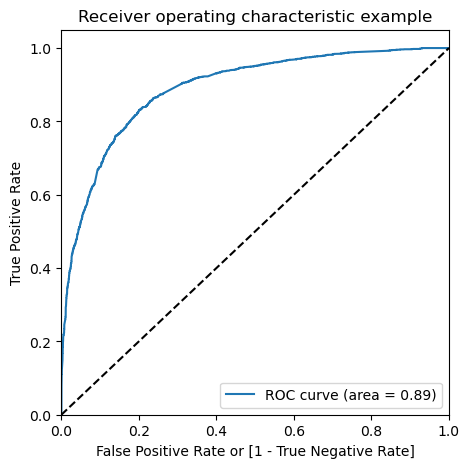

In [133]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Model can be considered as we have higher  area (0.89) under the ROC curve 

In [134]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188871,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.150701,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.247404,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.878882,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.735652,7987,1,1,1,1,1,1,1,1,1,0,0


In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188871,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.150701,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.247404,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.878882,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.735652,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [137]:
# Assigning Lead Score to the Training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.188871,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.150701,1012,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.247404,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.878882,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.735652,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


###  Evaluating the Model

In [138]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3153  752]
 [ 446 2000]]


In [139]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TRP / float(TRP+FLN))

Sensitivity :  0.7085036794766967


In [140]:
# Calculating the specificity
print("Specificity :",TRN / float(TRN+FLP))

Specificity : 0.8873239436619719


In [141]:
# Positive predictive value 
print("Positive Predictive Value :",TRP / float(TRP+FLP))

Positive Predictive Value : 0.7975149562816383


In [142]:
# Negative predictive value
print("Negative Predictive Value : ",TRN / float(TRN+ FLN))

Negative Predictive Value :  0.8293441838200096


#### Precision and recall tradeoff

In [143]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

### Making predictions on the test set

In [145]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [146]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[colm1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,...,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent
3271,0,0,-0.600595,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-0.888650,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [148]:
# Making predictions on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.124698
1490    0.969404
7936    0.107526
4216    0.905066
3830    0.126990
1800    0.635105
6507    0.367219
4821    0.292788
4223    0.921081
4714    0.247404
dtype: float64

In [149]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [150]:
y_pred_1.head()

,0
3271,0.124698
1490,0.969404
7936,0.107526
4216,0.905066
3830,0.126990


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

,Converted,Prospect ID,0
3271,0,3271,0.124698
1490,1,1490,0.969404
7936,0,7936,0.107526
4216,1,4216,0.905066
3830,0,3830,0.126990


In [160]:
# Rearranging the columns

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [161]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
3271,3271,0,0.124698
1490,1490,1,0.969404
7936,7936,0,0.107526
4216,4216,1,0.905066
3830,3830,0,0.126990


In [163]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
3271,3271,0,0.124698,0
1490,1490,1,0.969404,1
7936,7936,0,0.107526,0
4216,4216,1,0.905066,1
3830,3830,0,0.126990,0


In [164]:
#Checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8027910392948954


### Assigning Lead Score to the Testing data

In [165]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3271,3271,0,0.124698,0,12
1490,1490,1,0.969404,1,97
7936,7936,0,0.107526,0,11
4216,4216,1,0.905066,1,91
3830,3830,0,0.126990,0,13


## Observations

#### Accuracy : 80.27 %
#### Sensitivity : 70.85 %
#### Specificity : 88.73 %

### Finding out the leads which should be contacted

#### Customers whose "Lead Score" is equal to or greater than 85 can be termed as Hot Leads

In [166]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
print(hot_leads)

      Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score
1490         1490          1        0.969404                1          97
4216         4216          1        0.905066                1          91
4223         4223          1        0.921081                1          92
1946         1946          1        0.929537                1          93
2461         2461          1        0.993523                1          99
...           ...        ...             ...              ...         ...
1566         1566          1        0.948171                1          95
6461         6461          1        0.964961                1          96
5741         5741          1        0.917889                1          92
6299         6299          1        0.884914                1          88
6501         6501          1        0.910972                1          91

[384 rows x 5 columns]


#### 384 leads  can be contacted and have a high chance of getting converted.

## Recommendations:

A) The company should contact the leads who are "working professionals" as they are most likely to get converted.

B) The company should contact the leads coming from the lead sources "Welingak Websites" and "Reference" as these are most likely to get converted.

C) The company should make calls to the leads who spent "more time on the websites" as these are most likely to get converted.

D) The company should not contact the leads whose Specialization was "Others" as they are not likely to get converted.

E) The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.